**Sector**: Salud

**Problema**: Alta rotación de enfermeras en hospitales, afectando la estabilidad del personal y la calidad del servicio.

**Datos**: Información de empleados como edad, salario, departamento, satisfacción laboral, carga de trabajo, historial de permanencia y registros de deserción.

**Solución Propuesta**:

Modelo de clasificación para predecir si una enfermera dejará su empleo.
Implementación de estrategias de retención basadas en los factores identificados como más influyentes.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#Overview del dataset
df = pd.read_csv('C:/Users/Carlos Pitre/Downloads/dataset/watson_healthcare_modified.csv')
df.head()


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Revisamos si hay valores vacios

In [4]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Vemos que no hay registros vacios pero al ser un dataset donde se usa la informacion de empleados del sector salud podemos asegurarnos de que no hayan repetidos

In [5]:
print(f"Filas duplicadas: {df.duplicated().sum()}")


Filas duplicadas: 0


Vemos que hay tres columnas cuyos valores se mantienen para todos los registros,

In [6]:
df[df['EmployeeCount'] != 1]

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [7]:
df[df['StandardHours'] != 80]

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [8]:
df[df['Over18'] != 'Y']

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


por lo cual no nos aportan datos relevantes, se eliminan entonces en la siguiente celda

In [9]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

Se puede observar que hay columnas con datos de tipo objeto, estas columnas al revisar mas detalladamente son categoricas y podemos modificarlas para representarlas con valores numericos.

La columnas 'Attrition', 'OverTime' con valores de Si o No son modificadas de la siguiente forma:

In [10]:
# Columnas a codificar con Label Encoding 
label_cols = ['Attrition', 'OverTime','Gender']  # Porque solo tienen dos valores

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])  
    # Yes -> 1, No -> 0
    # Male -> 1 , Female -> 0

Las columnas restantes:
- BusinessTravel              
- Department                  
- EducationField              
- Gender                      
- JobRole                     
- MaritalStatus               

podemos observar que valores son mas frecuentes para asignarles un valor que represente cada categoria

In [11]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

for col in categorical_cols:
    print(f"Distribución en '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Distribución en 'BusinessTravel':
BusinessTravel
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: count, dtype: int64

--------------------------------------------------

Distribución en 'Department':
Department
Maternity     796
Cardiology    531
Neurology     349
Name: count, dtype: int64

--------------------------------------------------

Distribución en 'EducationField':
EducationField
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: count, dtype: int64

--------------------------------------------------

Distribución en 'JobRole':
JobRole
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: count, dtype: int64

--------------------------------------------------

Distribución en 'MaritalStatus':
MaritalStatus
Married     777
Single      522
Divorced    377
Name: count, dtype: int64

--

Ahora que conocemos los valores repetidos, podemos realizar un mapeo para asignarles un numero

In [12]:
df['BusinessTravel'] = df['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})

df['Department'] = df['Department'].map({
    'Maternity': 0,
    'Cardiology': 1,
    'Neurology': 2
})

df['EducationField'] = df['EducationField'].map({
    'Life Sciences': 0,
    'Medical': 1,
    'Marketing': 2,
    'Technical Degree': 3,
    'Other': 4,
    'Human Resources' : 5
})

df['JobRole'] = df['JobRole'].map({
    'Admin': 0,
    'Administrative': 1,
    'Other': 2,
    'Therapist': 3,
    'Nurse': 4
})

df['MaritalStatus'] = df['MaritalStatus'].map({
    'Single': 0,
    'Divorced': 1,
    'Married': 2
})

Entre otros detalles del dataset podemos observar nuestra variable de interes

In [13]:
print(df['Attrition'].value_counts())

Attrition
0    1477
1     199
Name: count, dtype: int64


El resultado anterior nos muestra que hay un desbalance entre los datos, entre las enfermeras que no desertan un 88.2% y las que si un 11.8% de los datos que tenemos, esto supone un reto ya que al hacer la prediccion el modelo tendera a predecir la clase de la cual se tengan mas datos. Entonces podemos hacer un sobremuestreo para generar datos:

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# características = X 
# la variable objetivo = y
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Dividimos el conjunto en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE solo en el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Revisar la nueva distribución
print(y_train_resampled.value_counts())

Attrition
0    1188
1    1188
Name: count, dtype: int64


De esta manera nuestro dataset esta preparado para su uso.

# 2. Analisis de Distribucion de Variables
Ahora que el dataset esta preparado, podemos observar las variables involucradas con el fin de entender como se comportan los datos.

De observar las columnas del dataset nos damos cuenta que hacen referencia a:
 

- **EmployeeID** → ID del empleado  
- **Age** → Edad  
- **Attrition** → Deserción (Si el empleado dejó la empresa o no)  
- **BusinessTravel** → Frecuencia de viajes de negocios  
- **DailyRate** → Tarifa diaria (salario diario)  
- **Department** → Departamento  
- **DistanceFromHome** → Distancia desde casa (en kilómetros o millas)  
- **Education** → Nivel educativo  
- **EducationField** → Área de educación (especialidad)  
- **EnvironmentSatisfaction** → Satisfacción con el entorno laboral  
- **Gender** → Género  
- **HourlyRate** → Tarifa por hora (salario por hora)  
- **JobInvolvement** → Nivel de compromiso con el trabajo  
- **JobLevel** → Nivel del puesto (jerarquía dentro de la empresa)  
- **JobRole** → Cargo o puesto de trabajo  
- **JobSatisfaction** → Satisfacción con el trabajo  
- **MaritalStatus** → Estado civil  
- **MonthlyIncome** → Ingreso mensual  
- **MonthlyRate** → Tarifa mensual  
- **NumCompaniesWorked** → Número de empresas en las que ha trabajado  
- **OverTime** → Horas extra (si el empleado trabaja fuera del horario regular)  
- **PercentSalaryHike** → Porcentaje de aumento salarial  
- **PerformanceRating** → Evaluación de desempeño  
- **RelationshipSatisfaction** → Satisfacción con las relaciones laborales  
- **Shift** → Turno de trabajo (mañana, tarde, noche)  
- **TotalWorkingYears** → Años totales trabajados  
- **TrainingTimesLastYear** → Número de entrenamientos recibidos en el último año  
- **WorkLifeBalance** → Equilibrio entre trabajo y vida personal  
- **YearsAtCompany** → Años en la empresa actual  
- **YearsInCurrentRole** → Años en el puesto actual  
- **YearsSinceLastPromotion** → Años desde el último ascenso  
- **YearsWithCurrManager** → Años trabajando con el mismo gerente  

Ahora trataremos de ver que clase de relacion tienen las unas con otras para luego seleccionar las adecuadas para nuestras predicciones, para ellos debemos primero unificar nuestros datos en un dataset nuevo despues del sobremuestreo:

In [15]:
# Volver a unir X_train_resampled con y_train_resampled para analizar la correlación
df_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)  # Convertir X a DataFrame con los nombres originales
df_resampled['Attrition'] = y_train_resampled  # Agregar la variable objetivo



Ahora si es posible revisar graficamente mediante un mapa de calor las correlaciones entre las variables:

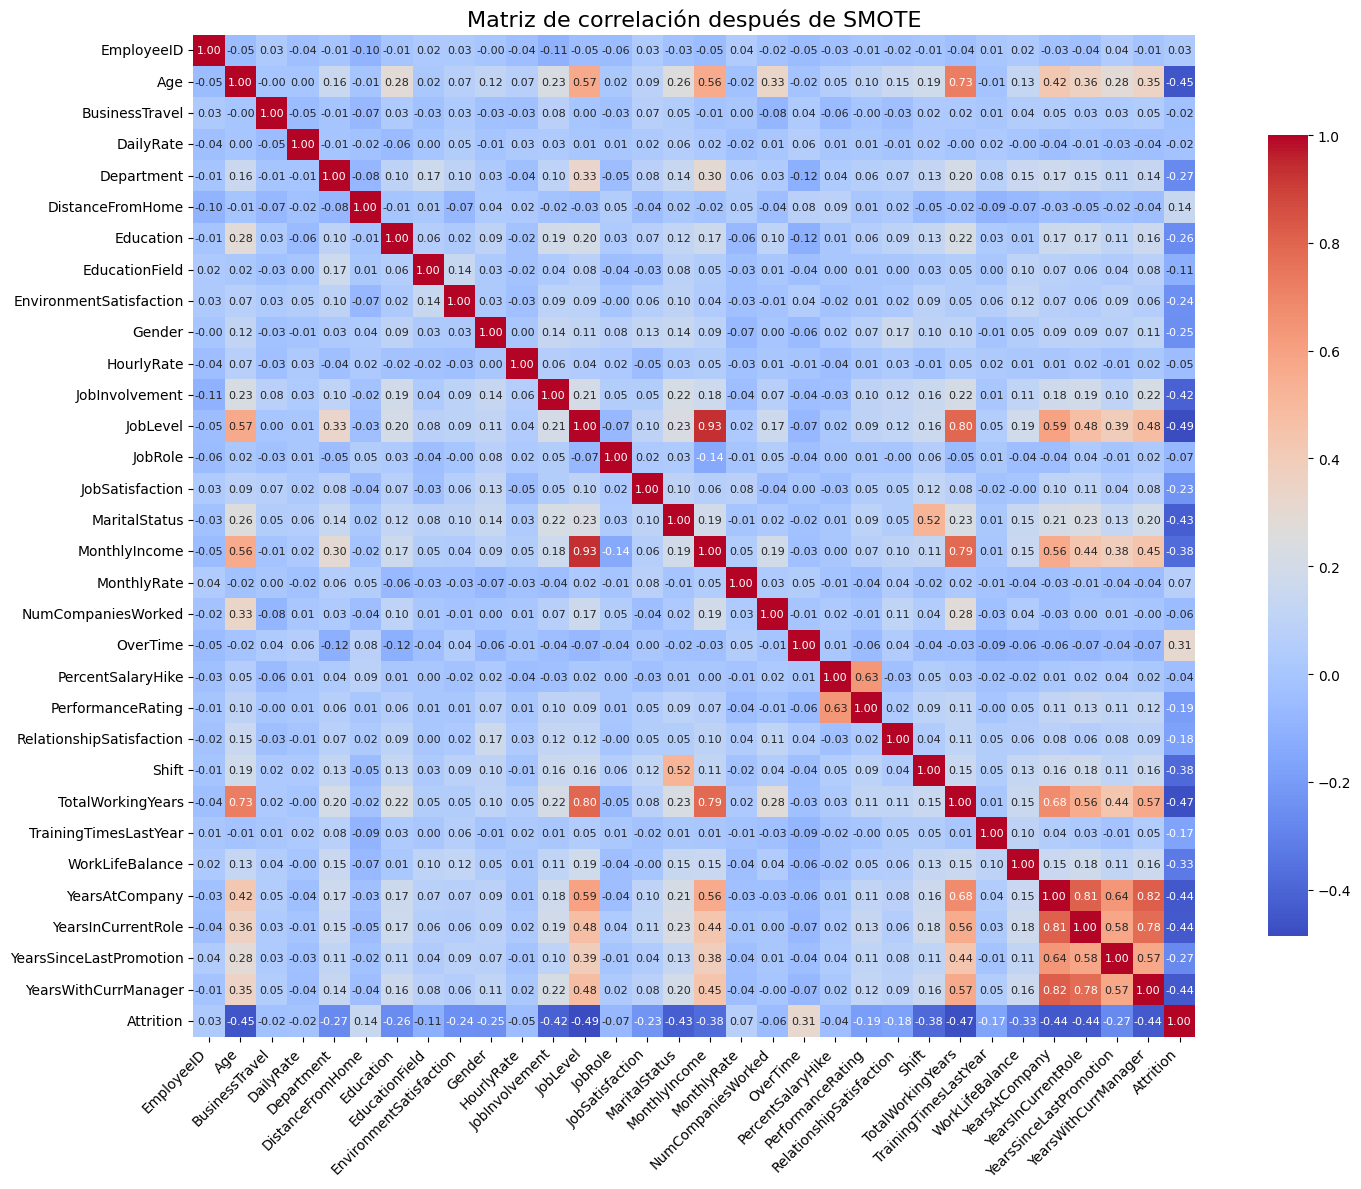

In [16]:
# Calcular la nueva matriz de correlación
corr = df_resampled.corr()

# Configurar el heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,
    cbar_kws={"shrink": 0.8},
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot_kws={"size": 8}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matriz de correlación después de SMOTE', fontsize=16)
plt.tight_layout()
plt.show()


La matriz de correlacion no nos muestra a simple vista relaciones fuertes asi que podemos usar otros metodos para analizar este aspecto, inciemos con analisis univariado

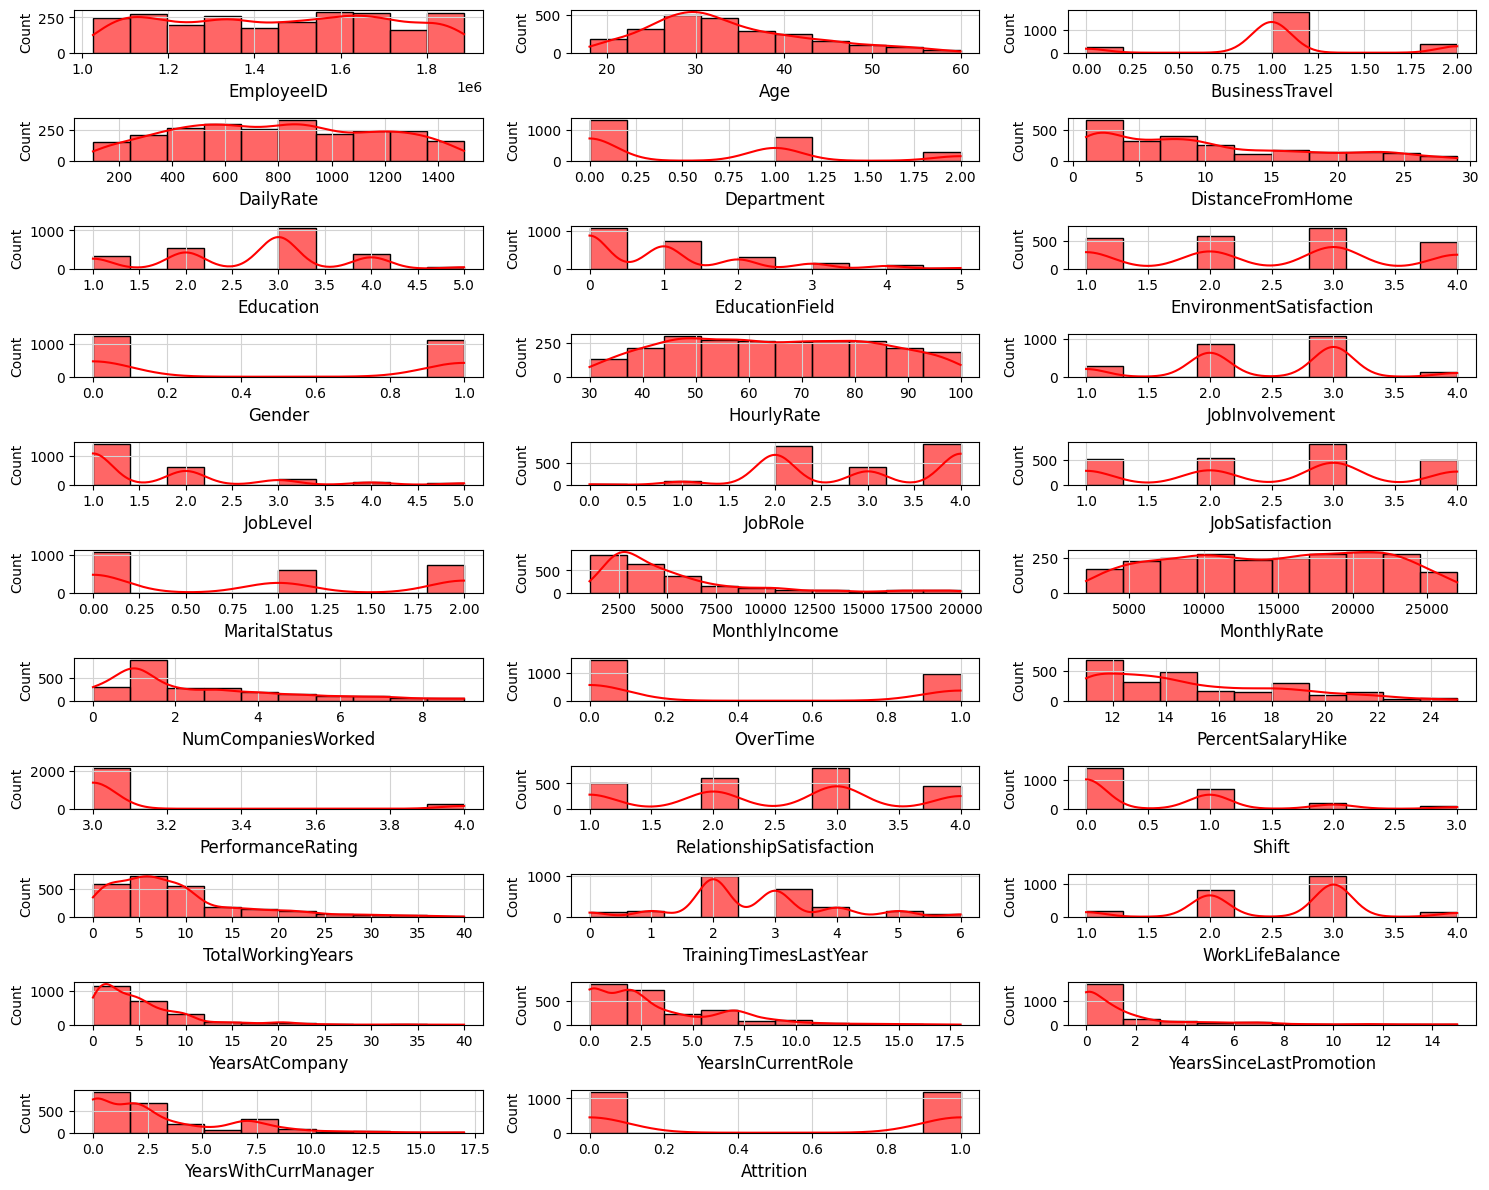

In [17]:
# Seleccionamos las variables numéricas
numerical_features = df_resampled.select_dtypes(include=['float64', 'int64']).columns

# Configuramos el número de filas y columnas dinámicamente
num_features = len(numerical_features)
ncols = 3  # Número de columnas
nrows = (num_features // ncols) + 1  # Calculamos el número de filas necesarias

# Configuramos el tamaño del gráfico y el estilo
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

# Aplanamos los ejes para facilitar el acceso
ax = ax.flatten()

# Creamos histogramas para cada variable numérica
for i, col in enumerate(numerical_features):
    values, bin_edges = np.histogram(df_resampled[col].dropna(),
                                     range=(np.floor(df_resampled[col].min()), np.ceil(df_resampled[col].max())))

    sns.histplot(df_resampled[col].dropna(), bins=bin_edges, kde=True, ax=ax[i], color='red', alpha=0.6)
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=10)
    ax[i].grid(color='lightgrey')

# Ocultamos cualquier eje vacío
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

# Ajustamos el diseño del gráfico
plt.tight_layout()
plt.show()

Observando podemos concluir:

*	"Age", "MonthlyIncome", "YearsAtCompany", "TotalWorkingYears": Distribuciones sesgadas a la derecha (muchos valores bajos, pocos valores altos).

*	"JobLevel", "JobRole", "MaritalStatus", "PerformanceRating": Las graficas presentan valores dominantes lo que nos indica categorías marcadas claramente en estas columnas.

*	“Attrition”: posee dos valores muy marcados que confirman el proceso exitoso de balanceo del dataset.


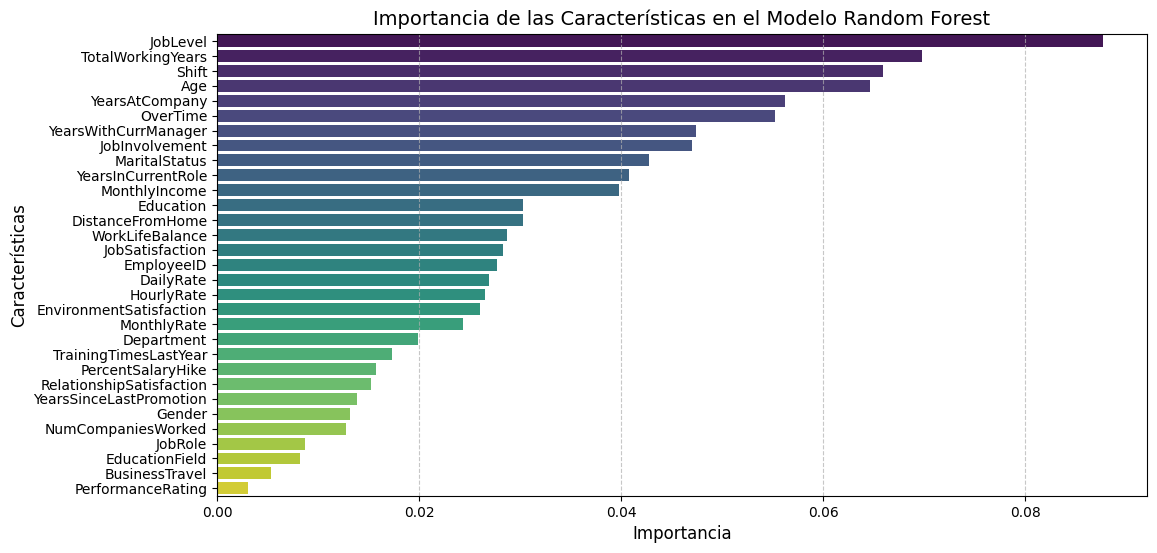

In [25]:
# Entrenar el modelo para obtener las importancias
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
importances = rf.feature_importances_

# Convertir a un DataFrame para visualizar
feature_importance = pd.Series(importances, index=X_train_resampled.columns).sort_values(ascending=False)

# graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")

# Personalizar la gráfica
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.title("Importancia de las Características en el Modelo Random Forest", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



Gracias a esta grafica podemos observar cuales son las caracteristicas con relaciones mas fuertes (>0.06 y <0.06 ), para el modelo entonces podemos tomar las mas relevante siendo estas:'JobLevel','Age', 'Shift','TotalWorkingYears','YearsAtCompany'

# 3. Modelo de Prediccion

Partimos dividiendo los datos del dataset en conjuntos de entrenamiento y prueba para dos modelos, se usan solo los datos de las columnas de mayor importancia:

In [18]:
# Definir características y variable objetivo
X = df_resampled[['JobLevel','Age', 'Shift','TotalWorkingYears','YearsAtCompany']]
y = df_resampled['Attrition']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Primero modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# Predicciones y evaluación
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.80      0.84       357
           1       0.82      0.88      0.85       356

    accuracy                           0.84       713
   macro avg       0.84      0.84      0.84       713
weighted avg       0.84      0.84      0.84       713



El primer modelo tiene una precision de 84% lo cual indica que es capaz de predecir la desercion correctamente.

In [26]:
#Segundo Modelo

# Dividir en conjunto de entrenamiento y prueba
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar un modelo con los datos actuales
rf_1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_1.fit(X_train_1, y_train_1)


# Predicciones y evaluación
y_pred_1 = rf_1.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))


              precision    recall  f1-score   support

           0       0.85      0.80      0.82       238
           1       0.81      0.86      0.84       238

    accuracy                           0.83       476
   macro avg       0.83      0.83      0.83       476
weighted avg       0.83      0.83      0.83       476



El segundo modelo tiene una precision del 83% una diferencia leve con el anterior.

<Figure size 1000x600 with 0 Axes>

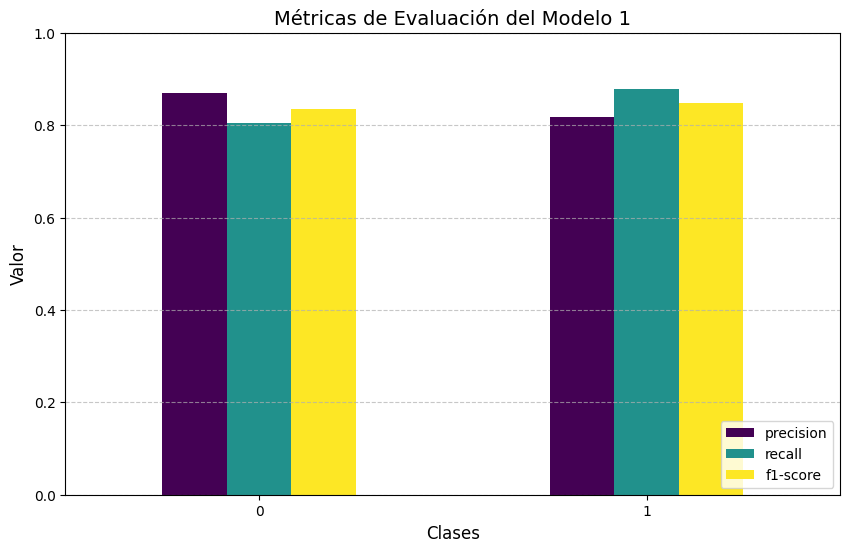

In [30]:
# Obtener reporte de clasificación del primer modelo
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(["accuracy", "macro avg", "weighted avg"])

# Crear el gráfico
plt.figure(figsize=(10, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Personalizar la gráfica
plt.title("Métricas de Evaluación del Modelo 1", fontsize=14)
plt.xlabel("Clases", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.ylim(0, 1)  # Asegurar que las métricas van de 0 a 1
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

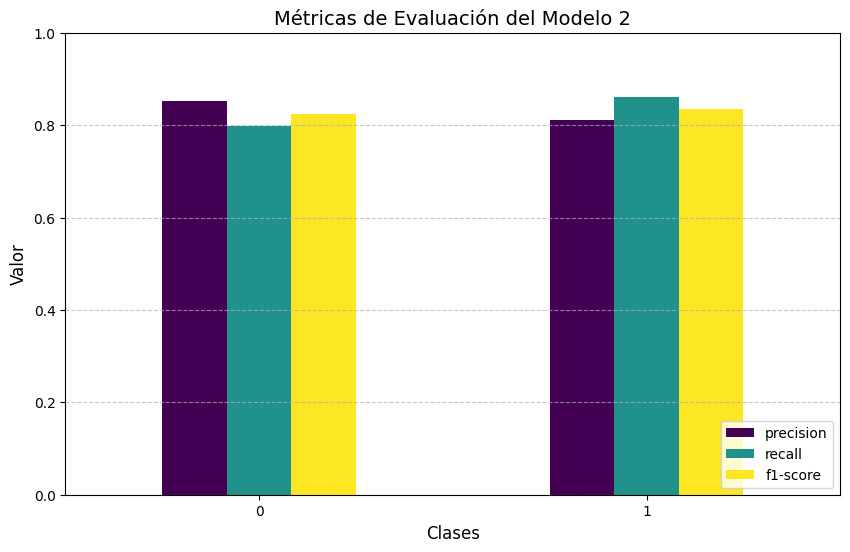

In [31]:
# Obtener reporte de clasificación del primer modelo
report = classification_report(y_test_1, y_pred_1, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(["accuracy", "macro avg", "weighted avg"])

# Crear el gráfico
plt.figure(figsize=(10, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Personalizar la gráfica
plt.title("Métricas de Evaluación del Modelo 2", fontsize=14)
plt.xlabel("Clases", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.ylim(0, 1)  # Asegurar que las métricas van de 0 a 1
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


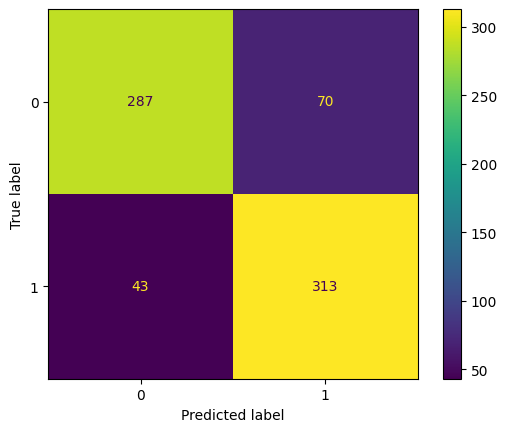

In [24]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


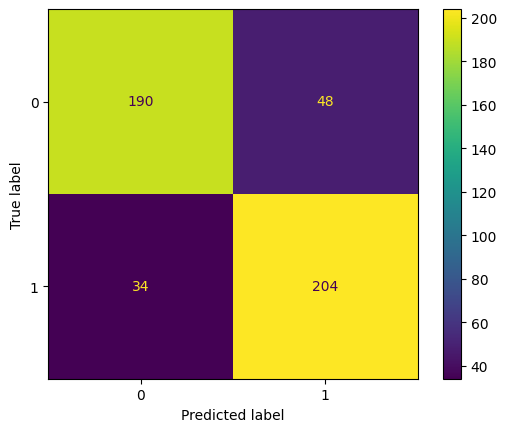

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_1, rf_1.predict_proba(X_test_1)[:, 1])
roc_auc = auc(fpr, tpr)

# Matriz de confusión
cm = confusion_matrix(y_test_1, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Las matrices de confusion nos indican que el modelo reconoce correctamente cada clase y tiene pocos falsos positivos y falsos negativos

Ahora podemos tomar nuestro mejor modelo y tratar de optimizarlo en pro de obtener mejores resultados

In [32]:
#Optimizacion usando Hiperparametros
# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Entrenar con los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluar métricasf
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       357
           1       0.82      0.87      0.84       356

    accuracy                           0.84       713
   macro avg       0.84      0.84      0.84       713
weighted avg       0.84      0.84      0.84       713



No se obtiene un gran cambio lo que indica que nuestro modelo inicial estaba bien balanceado, también podria ser resultado de la tecnica de balanceo de datos usada.